In [2]:
import os
import cv2
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:

# Mount your Google Drive
drive.mount('/content/drive')

# Define the path to the train and test data directories
train_path = "/content/drive/MyDrive/dataset/train/train"

# Get the list of all folders in the train directory
folders = os.listdir(train_path)

# Define the image size and the number of channels
img_size = 28
num_channels = 1

# Define the empty lists to store the images and their respective labels
x_train = []
y_train = []

# Loop through each folder and read the images
for folder in folders:
    # Define the path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of all image files in the current folder
    files = os.listdir(folder_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(folder_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        x_train.append(img.flatten() / 255)
        # Append the image and its respective label to the lists
        #x_train.append(img)
        y_train.append(int(folder))

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Print the shape of the training data and target labels
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

Mounted at /content/drive
Training data shape: (1000, 784)
Training labels shape: (1000,)


In [4]:
# Define the path to the train and test data directories
test_path = "/content/drive/MyDrive/dataset/val/val"

# Get the list of all folders in the train directory
folders = os.listdir(test_path)

# Define the image size and the number of channels
img_size = 28
num_channels = 1

# Define the empty lists to store the images and their respective labels
x_test = []
y_test = []

# Loop through each folder and read the images
for folder in folders:
    # Define the path to the current folder
    folder_path = os.path.join(test_path, folder)
    # Get the list of all image files in the current folder
    files = os.listdir(folder_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(folder_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        x_test.append(img.flatten() / 255)
        y_test.append(int(folder))

# Convert the lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Print the shape of the training data and target labels
print("Training data shape:", x_test.shape)
print("Training labels shape:", y_test.shape)

Training data shape: (178, 784)
Training labels shape: (178,)


In [5]:
import numpy as np
# create a list of column names
# create a list of column names for the Xtrain data
column_names = ["pixel" + str(i) for i in range(784)]

# stack the Ytrain and Xtrain arrays horizontally
combined_data = np.column_stack((y_train, x_train))

# save the combined data to a CSV file
np.savetxt("train.csv", combined_data, delimiter=",", header="label," + ",".join(column_names), comments="")

In [6]:
import numpy as np
# create a list of column names for the Xtrain data
column_names = ["pixel" + str(i) for i in range(784)]

# stack the Ytrain and Xtrain arrays horizontally
combined_data = np.column_stack((y_test, x_test))

# save the combined data to a CSV file
np.savetxt("test.csv", combined_data, delimiter=",", header="label," + ",".join(column_names), comments="")

In [7]:
data = pd.read_csv('train.csv')
data['label'] = data['label'].astype(int)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0.996078,0.929412,0.929412,0.462745,0.0,0.000000,0.000000,0.066667,0.945098,...,1.0,1.0,1.0,0.0,0.200000,0.952941,1.000000,1.000000,1.000000,1.000000
1,5,0.996078,0.729412,0.000000,0.000000,0.0,0.000000,0.862745,0.933333,1.000000,...,1.0,1.0,1.0,1.0,1.000000,0.972549,0.462745,0.000000,0.784314,1.000000
2,5,0.929412,0.729412,0.000000,0.000000,0.0,0.729412,0.929412,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.215686,0.000000
3,5,0.862745,0.000000,0.000000,0.000000,0.0,0.729412,0.929412,1.000000,1.000000,...,1.0,1.0,1.0,1.0,0.984314,0.596078,0.000000,0.596078,0.984314,1.000000
4,5,1.000000,0.984314,0.929412,0.462745,0.0,0.000000,0.000000,0.000000,0.200000,...,1.0,1.0,1.0,1.0,1.000000,1.000000,0.964706,0.333333,0.000000,0.862745


In [8]:
testdata = pd.read_csv('test.csv')
testdata['label'] = testdata['label'].astype(int)
testdata.head(178)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.498039,0.000000,0.784314,1.000000
1,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.000000,0.945098,0.929412,0.929412,0.929412,0.929412,0.462745,0.000000,0.000000,0.000000
2,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.000000,0.000000,0.929412,0.000000,0.000000,0.000000,0.000000,0.596078,0.984314,1.000000
3,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.070588,0.070588,0.070588,0.070588,0.054902,0.000000,0.462745,0.929412,0.929412,0.929412
4,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.929412,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
174,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.862745,0.000000,...,0.929412,0.200000,0.000000,0.066667,0.929412,0.952941,1.000000,1.000000,1.000000,1.000000
175,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.972549,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
176,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2


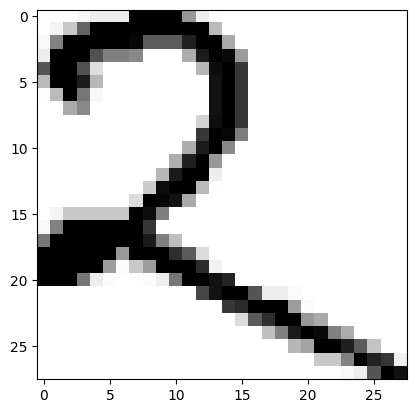

In [9]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_train = data[0:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n]
_,m_train = X_train.shape

label = Y_train[1]
print(label)
current_image = X_train[:, 1, None]
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

7


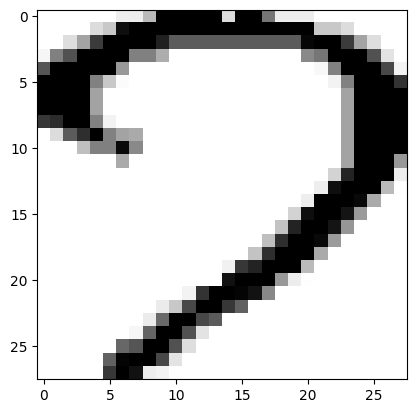

In [10]:
testdata = np.array(testdata)
m, n = testdata.shape
np.random.shuffle(testdata)


data_dev = testdata[0:m].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n]


label = Y_dev[1]
print(label)
current_image = X_dev[:, 1, None]
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    print("#"*100)
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("ACCURACY -----> ",get_accuracy(predictions, Y),"\n")
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01,   3000)
print("Final weights","\n")
print("w1 : ",W1,"\n")
print("w2 : ",W2,"\n")
print("Final bias","\n")
print("b1 : ",b1,"\n")
print("b2 : ",b2,"\n")

Iteration:  0
####################################################################################################
ACCURACY ----->  0.109 

Iteration:  10
####################################################################################################
ACCURACY ----->  0.14 

Iteration:  20
####################################################################################################
ACCURACY ----->  0.219 

Iteration:  30
####################################################################################################
ACCURACY ----->  0.399 

Iteration:  40
####################################################################################################
ACCURACY ----->  0.489 

Iteration:  50
####################################################################################################
ACCURACY ----->  0.542 

Iteration:  60
####################################################################################################
ACCURACY ----->  0.577 

Iteration:  70


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _,A2  = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_prediction1(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

####################################################################################################
Prediction:  [6]
Label:  6


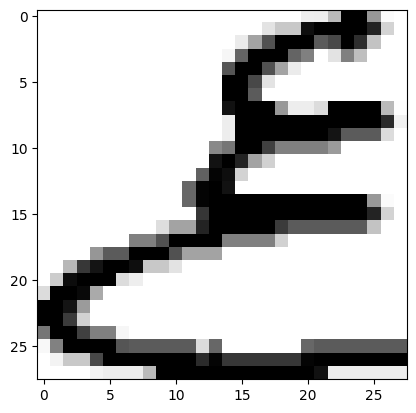

####################################################################################################
Prediction:  [2]
Label:  2


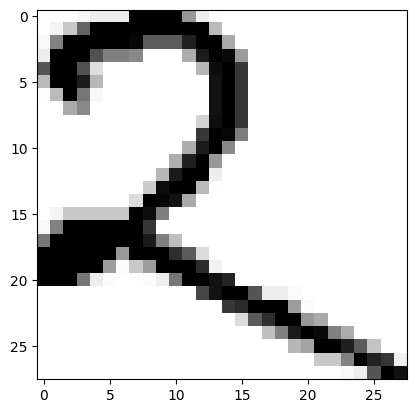

####################################################################################################
Prediction:  [4]
Label:  4


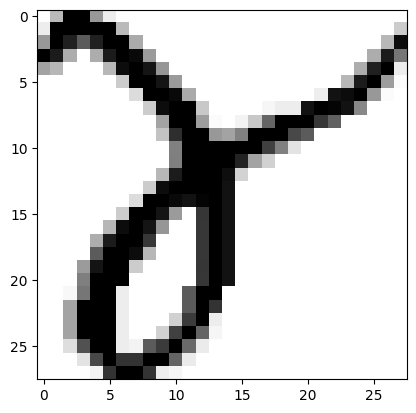

####################################################################################################
Prediction:  [8]
Label:  8


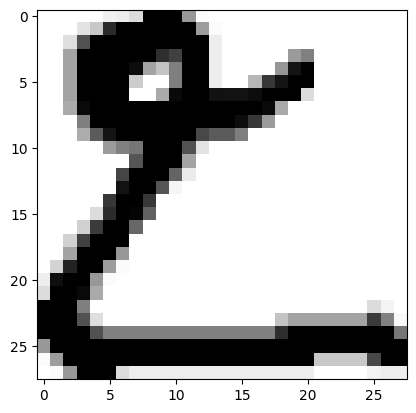

####################################################################################################
Prediction:  [8]
Label:  8


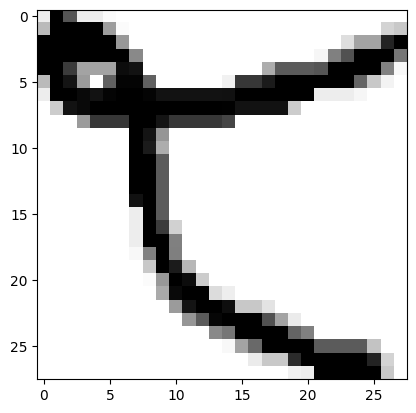

####################################################################################################
Prediction:  [7]
Label:  7


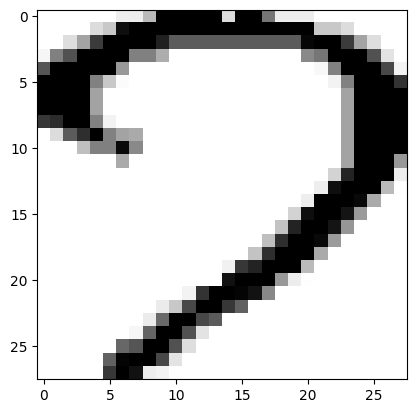

####################################################################################################
Prediction:  [3]
Label:  3


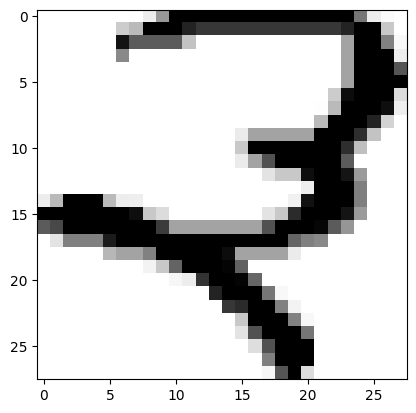

####################################################################################################
Prediction:  [9]
Label:  9


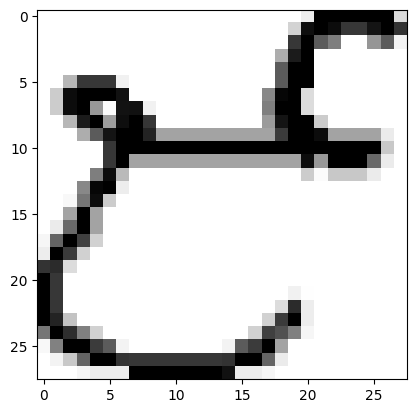

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

test_prediction1(0, W1, b1, W2, b2)
test_prediction1(1, W1, b1, W2, b2)
test_prediction1(2, W1, b1, W2, b2)
test_prediction1(3, W1, b1, W2, b2)

####################################################################################################
Accuracy 0.9157303370786517
conf_matrix :  

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  1  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0]
 [ 0  0  1  0 16  1  0  0  0  0]
 [ 0  0  1  0  0 17  0  0  0  0]
 [ 0  0  2  0  1  0 18  0  0  1]
 [ 0  4  0  0  1  0  0 17  0  0]
 [ 1  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 19]] 



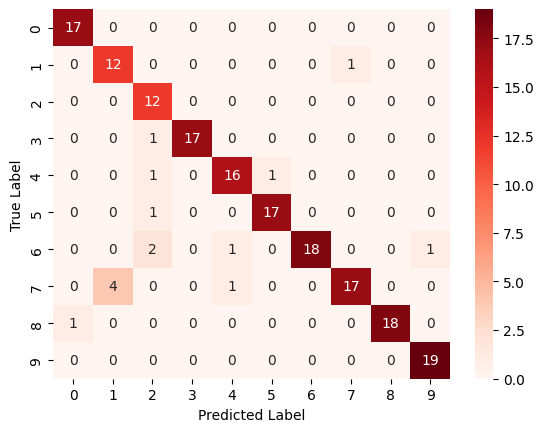

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy",get_accuracy(dev_predictions, Y_dev))
# Generate confusion matrix and heatmap
conf_matrix = confusion_matrix(dev_predictions, Y_dev)
print("conf_matrix : ","\n")
print(conf_matrix,"\n")
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Epoch 1/200
25/25 [==============================] - 2s 23ms/step - loss: 2.2850 - accuracy: 0.1800 - val_loss: 2.2579 - val_accuracy: 0.2250
Epoch 2/200
25/25 [==============================] - 0s 12ms/step - loss: 2.1844 - accuracy: 0.3925 - val_loss: 2.0841 - val_accuracy: 0.5250
Epoch 3/200
25/25 [==============================] - 0s 11ms/step - loss: 1.8911 - accuracy: 0.5450 - val_loss: 1.6882 - val_accuracy: 0.5800
Epoch 4/200
25/25 [==============================] - 0s 12ms/step - loss: 1.4154 - accuracy: 0.6212 - val_loss: 1.2106 - val_accuracy: 0.7600
Epoch 5/200
25/25 [==============================] - 0s 11ms/step - loss: 1.0105 - accuracy: 0.7350 - val_loss: 0.8821 - val_accuracy: 0.7450
Epoch 6/200
25/25 [==============================] - 0s 12ms/step - loss: 0.7903 - accuracy: 0.7575 - val_loss: 0.6707 - val_accuracy: 0.8400
Epoch 7/200
25/25 [==============================] - 0s 13ms/step - loss: 0.6165 - accuracy: 0.8087 - val_loss: 0.5486 - val_accuracy: 0.8600
Epoch 

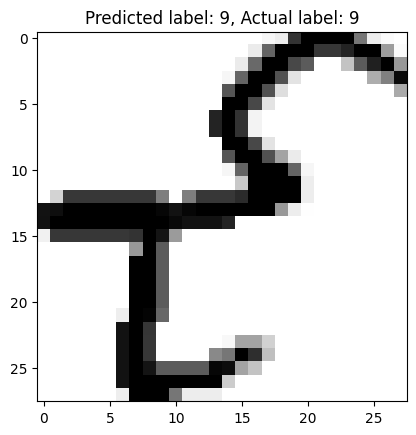

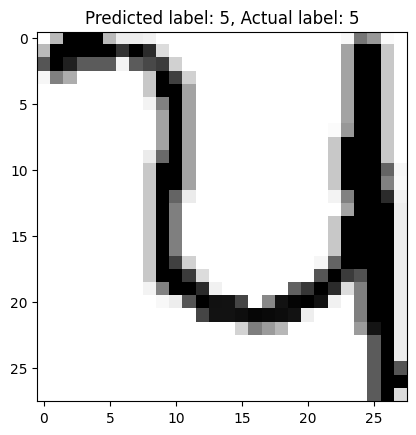

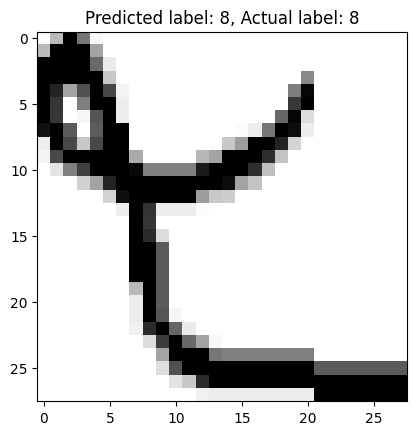

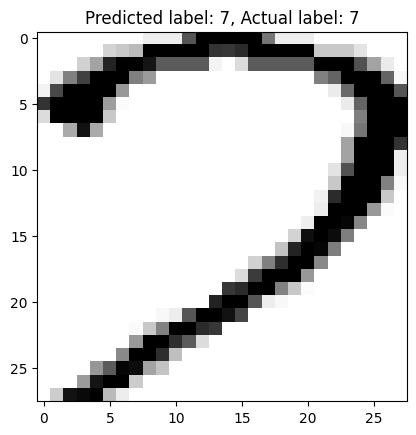

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the data from CSV files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Split the data into input features (pixels) and target variable (labels)
X_train = train_data.iloc[:, 1:].values.astype('float32') / 255.0
y_train = train_data.iloc[:, 0].values.astype('int32')

X_test = test_data.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_data.iloc[:, 0].values.astype('int32')

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Display a random image from the test set along with its predicted and actual labels
random_index = np.random.randint(0, len(X_test))
plt.imshow(X_test[random_index].reshape((28, 28)), cmap='gray')
plt.title("Predicted label: " + str(np.argmax(predictions[random_index])) + ", Actual label: " + str(y_test[random_index]))
plt.show()
random_index = np.random.randint(1, len(X_test))
plt.imshow(X_test[random_index].reshape((28, 28)), cmap='gray')
plt.title("Predicted label: " + str(np.argmax(predictions[random_index])) + ", Actual label: " + str(y_test[random_index]))
plt.show()
random_index = np.random.randint(3, len(X_test))
plt.imshow(X_test[random_index].reshape((28, 28)), cmap='gray')
plt.title("Predicted label: " + str(np.argmax(predictions[random_index])) + ", Actual label: " + str(y_test[random_index]))
plt.show()
random_index = np.random.randint(4, len(X_test))
plt.imshow(X_test[random_index].reshape((28, 28)), cmap='gray')
plt.title("Predicted label: " + str(np.argmax(predictions[random_index])) + ", Actual label: " + str(y_test[random_index]))
plt.show()


In [18]:
# Generate confusion matrix and heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
print("conf_matrix : ","\n")
print(conf_matrix,"\n")



conf_matrix :  

[[18  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  3  0  0]
 [ 0  0 14  0  1  2  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 20]] 



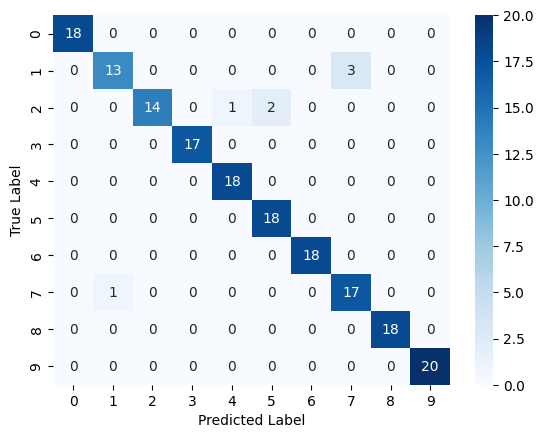

In [19]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()